<a href="https://colab.research.google.com/github/QuinnGrace/StatML4PopHealth/blob/changes/practicals/day4/practical5/Compartmental_models_in_stan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://raw.githubusercontent.com/MLGlobalHealth/StatML4PopHealth/main/practicals/resources/logos/imperial.png" width="250" vspace="8"/>
<img src="https://raw.githubusercontent.com/MLGlobalHealth/StatML4PopHealth/main/practicals/resources/logos/mlgh.png" width="220" hspace="50" vspace="5"/>
<img src="https://raw.githubusercontent.com/MLGlobalHealth/StatML4PopHealth/main/practicals/resources/logos/ammi.png" width="190"/>

<font size="6">Modern Statistics and Machine Learning <br>for Population Health in Africa </font>

<font size="4">24th - 28th March 2025</font>

</center>

# Compartmental Models in Stan
### Ettie Unwin

The first part of this tutorial is based on a paper by [Ginsztajn et al.](https://onlinelibrary.wiley.com/doi/full/10.1002/sim.9164). This work is licensed under a [Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License](https://creativecommons.org/licenses/by-nc-nd/4.0/).

In this tutorial, we demonstrate how to formulate, fit, and diagnose compartmental model like the ones we considered this morning in Stan using the [cmdstanpy](https://mc-stan.org/cmdstanpy/) interface. (See yesterday's notes for why we are interested in using Stan). We consider two different types of routinely collected data to fit our models to: prevalence data (number / proportion of infected people in a population) and incidence data (newly infected people in a population).

In this example, we examine an outbreak of influenza A (H1N1) in 1978 at a British boarding school. The data consists of the daily number of students in bed (prevalence data), spanning over a time interval of 14 days. There were 763 male students who were mostly full boarders and 512 of them became ill. The outbreak lasted from the 22nd of January to the 4th of February. It is reported that one infected boy started the epidemic, which spread rapidly in the relatively closed community of the boarding school. The data are freely available in the R package outbreaks, maintained as part of the [R Epidemics Consortium](http://www.repidemicsconsortium.org/), and is a great resource for trying to fit different models yourself after the course. This is only available as an R package so we have saved the data as a .json file to use for this practical. Since there was no publicly available incidence data associated with this outbreak, we provide some simulated data created to mimic the behaviour of the outbreak.

## Install cmdstanpy
Like the other practicals, we will start by install cmdstanpy for this notebook.

In [1]:
!curl -O "https://raw.githubusercontent.com/MLGlobalHealth/StatML4PopHealth/main/practicals/resources/scripts/utilities.py"

from utilities import custom_install_cmdstan, test_cmdstan_installation

custom_install_cmdstan()

# if we want to test the installation, we can run the bernoulli hello world example
test_cmdstan_installation()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2066  100  2066    0     0  11779      0 --:--:-- --:--:-- --:--:-- 11738
Installing cmdstanpy==1.2.5
Unpacking colab-cmdstan-2.36.0.tar.gz
Installing required libtbb2 Linux package
Setting cmdstan path


DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:cmd: /content/cmdstan-2.36.0/examples/bernoulli/bernoulli info
cwd: None
12:16:41 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


CmdStan successfully installed!
data {
  int<lower=0> N;
  array[N] int<lower=0, upper=1> y;
}
parameters {
  real<lower=0, upper=1> theta;
}
model {
  theta ~ beta(1, 1); // uniform prior on interval 0,1
  y ~ bernoulli(theta);
}
{
    "N" : 10,
    "y" : [0,1,0,0,0,0,0,0,0,1]
}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/cmdstan-2.36.0/examples/bernoulli/bernoulli', 'id=2', 'random', 'seed=123', 'data', 'file=cmdstan-2.36.0/examples/bernoulli/bernoulli.data.json', 'output', 'file=/tmp/tmpgxleer8e/bernoullivezci_wz/bernoulli-20250327121641_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/cmdstan-2.36.0/examples/bernoulli/bernoulli', 'id=1', 'random', 'seed=123', 'data', 'file=cmdstan-2.36.0/examples/bernoulli/bernoulli.data.json', 'output', 'file=/tmp/tmpgxleer8e/bernoullivezci_wz/bernoulli-20250327121641_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/cmdstan-2.36.0/examples/bernoulli/bernoulli', 'id=3', 'random', 'seed=123', 'data', 'file=cmdst

12:16:41 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/cmdstan-2.36.0/examples/bernoulli/bernoulli', 'id=1', 'random', 'seed=123', 'data', 'file=cmdstan-2.36.0/examples/bernoulli/bernoulli.data.json', 'output', 'file=/tmp/tmpgxleer8e/bernoullivezci_wz/bernoulli-20250327121641_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpgxleer8e/bernoullivezci_wz/bernoulli-20250327121641_1.csv
 console_msgs (if any):
	/tmp/tmpgxleer8e/bernoullivezci_wz/bernoulli-20250327121641_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = false (Default)
    thin = 1 (Default)
    adapt
      engaged = true (Default)
      gamma = 0.05 (Default)
   

## Exploring the data

First we will load in all the images and data that we will need for this practical.


In [2]:
import subprocess

resource_urls= [
    # data
    "https://raw.githubusercontent.com/MLGlobalHealth/StatML4PopHealth/main/practicals/day4/practical5/data/flu_data.csv",
    "https://raw.githubusercontent.com/MLGlobalHealth/StatML4PopHealth/main/practicals/day4/practical5/data/incidence.csv",
    # # Stan models
    "https://raw.githubusercontent.com/MLGlobalHealth/StatML4PopHealth/main/practicals/day4/practical5/stan_models/sir_model.stan"
     ]

# Note this will overwrite existing files, remove -O if that is not desired
for url in resource_urls:
   subprocess.run(["curl", "-O", url], check=True)

!ls

cmdstan-2.36.0		     flu_data.csv   __pycache__  sir_model.stan
colab-cmdstan-2.36.0.tar.gz  incidence.csv  sample_data  utilities.py


Now we can use these files.  The first one we will explore is the flu data.

In [3]:
# Load in the data using pandas
import pandas as pd
df = pd.read_csv('flu_data.csv')

# Convert the dates to datetime format
df.Date = pd.to_datetime(df.date)

# Use date as index
df = df.set_index("date")

print(df)

            in_bed  convalescent
date                            
1978-01-22       3             0
1978-01-23       8             0
1978-01-24      26             0
1978-01-25      76             0
1978-01-26     225             9
1978-01-27     298            17
1978-01-28     258           105
1978-01-29     233           162
1978-01-30     189           176
1978-01-31     128           166
1978-02-01      68           150
1978-02-02      29            85
1978-02-03      14            47
1978-02-04       4            20


<ipython-input-3-eeb6b69fd9ae>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Date = pd.to_datetime(df.date)


From this we can see that we have a two week timeseries, as expected, with dates, numbers of students in bed and the number who are convalescing.

Q1) Make a plot of the timeseries.

<Axes: xlabel='date'>

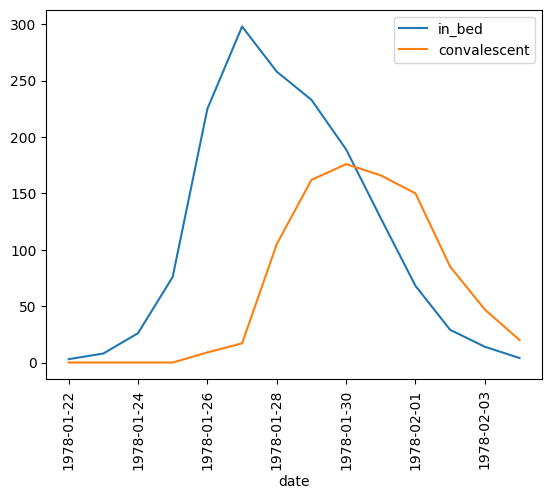

In [6]:
df.plot(kind='line',rot='vertical')

## Fitting an SIR (transmission) model to prevalence data
The simplest model we can consider is the Susceptible-Infected-Recovered (SIR) model. This splits the population in three time-dependent compartments: the susceptible ($S$), the infected (and infectious) ($I$), and the recovered (and not infectious) compartments ($R$). When a susceptible individual comes into contact with an infectious individual, the former can become infected for some time, and then recover and become immune.  

<img src=" https://raw.githubusercontent.com/MLGlobalHealth/StatML4PopHealth/main/practicals/day4/practical5/images/sir.png">

From Figure 1, the rate of progression between the S and I compartments is $\beta * I / N$ where $\beta$ is the contact rate, $I$ is the number of infected people and $N$ is the total population. The rate of progression between the $I$ and $R$ compartments is $\sigma$ the recovery rate or 1 divided by the duration of infection.



Q2) Define the equations for an SIR model.



N = S + I + R

I = sum(in_bed)

R = sum(convalescent)


dS/dt = -(BSI)/N

dI/dt = (BSI)/N - sigma*I

dR/dt = sigma*I


Q3) What are the assumptions of this model?

No births, no deaths, no treatments.

## Defining the statistical model
We now define the statistical inference model that we will use to fit our tranmission model to data. Here we introduce the likelihood or sampling distribution for our model
$$p(y|\theta),$$
which tells us, given model parameters $\theta$, how to generate data $y$. In a Bayesian framework, the set of plausible values is characterised by the posterior distribution,
$$
p(\theta | y).
$$

Bayes’ rule teaches us that
$$
p(\theta | y) \sim p(y | \theta) p(\theta)
$$
where $p(\theta | y)$ is our posterior distribution and this is proportional to $p(y|\theta)$ our likelihood multiplied by $p(θ)$ our prior distribution. The prior encodes information or our belief about the parameters we have before observing the data.

### The likelihood
This is the part of the model that we used to link the model estimates of the number of infected students, $I_{ODE}(t)$, for given parameters ($\beta$ and $\sigma$) to the observed data, i.e the number of students in bed, $I_{obs}(t)$. We choose to model the number of students in bed with a count distribution – the Negative Binomial. This distribution allows us to use $I_{ODE}(t)$ as the expected value and account for over-dispersion, through the parameter $\phi$:
$$
I_{obs}(t)∼NegBin(I_{ODE}(t), \phi)
$$
Therefore our likelihood is $p(y∣\theta)$, with $\theta = (\beta, \sigma, \phi)$ as the parameters of the model.


### Priors
We need to specify a prior for each of our three parameter $\theta = (\beta, \sigma, \phi)$. One advantage of the Bayesian approach is that we can formally incorporate prior knowledge about the parameters into the model. We can change this prior if more information becomes available, constraining our parameter estimation more tightly or, on the contrary, increasing its variance. Choosing priors is one of the tricky parts of Bayesian modelling but comes with practice.


### Predictions and derived quantities
Once we fit the model and obtain a posterior distribution for $\theta$, we can derive additional quantities of interests. The posterior distribution of predictions:
$$
p(y_{pred}∣y)=\int p(y_{pred}|\theta) p(\theta | y)d\theta.
$$

## Coding the model in Stan

We will need to import the following packages to fit the compartmental model in Stan.


In [7]:
# Load packages used in this installation
import os
import json
import shutil
import urllib.request

from cmdstanpy import CmdStanModel

Now we need to install CmdStanPy.

Step 1: install CmdStanPy

### Coding the ODE
An ODE takes the form
$$
\frac{dz}{dt}=f(t,z)
$$
where $z$ are the states of the compartmental model ($z=(S,I,R)$ for our first example) and $t$ is time. We also need to provide initial conditions $z_0$ at $t_0$ and the times, $τ$, at which we evaluate the solution.

To specify an ODE in Stan, we first code $f$ in the functions block. This function must observe a strict signature:

```python
vector f(real time, vector state, ...)
```

where

* time, $t$;
* state, the different compartment, $z$;
* ..., optional arguments for the different parameters in the model.

In our example, the ODEs for the SIR model is defined with the following structure.

```python
functions {
  vector sir(real t,
             vector y,
             real beta,
             real sigma,
             real N) {

      vector[3] dydt;

      real S = y[1];
      real I = y[2];
      real R = y[3];
      
      dydt[1] =  S equation;
      dydt[2] =  I equation;
      dydt[3] =  R equation;
      
      return dydt;
  }
}



Q4) Fill in the equations for the differential equations for S, I and R:

```python
dS/dt = -(BSI)/N

dI/dt = (BSI)/N - sigma*I

dR/dt = sigma*I
```

We evaluate the solution numerically by using one of Stan’s numerical integrators.  Here we choose the Runge-Kutta 4th / 5th order and a call to the integrator looks as follows:

```python
y = ode_rk45(sir, y0, t0, t, beta, sigma, N);;
```
where

* sir, the name of the function that returns the derivatives that we wrote earlier;
* y0, the initial condition;
* t0, the time of the initial condition;
* t, the times at which we require the solution to be evaluated;
* beta, the transmission parameter;
* sigma, the recovery rate;
* N, the number of people in our population.

We now have all the ingredients to solve our ODE.


### Building the model
We next code the model in Stan, working through the following coding blocks.

A) We first need the function block from above that specifies the SIR model.  

B) Fixed data is declared in the data block.  This is things like the initial conditions, times and number of days.
```python
data {
  int n_days;
  vector[3] y0;
  real t0;
  array[n_days] real t;
  int N;
  array[n_days] int cases;
}
```

C) We next declare the model parameters. If you want some parameter to be bounded, and it is not already guaranteed by it's prior, you need to specify <lower=a, upper=b> when declaring this parameter. Note that this is how you put a truncated prior distribution on a parameter and here we choose to define a prior on the inverse of $\phi$.  
```python
parameters {
  real<lower=0> sigma;
  real<lower=0> beta;
  real<lower=0> phi_inv;
}
```

D) And then transforms of the parameters
```python
transformed parameters{
  real y[n_days, 3];
  real phi = 1. / phi_inv;
  {
    real theta[2]; // model parameters
    theta[1] = beta;
    theta[2] = sigma;

    y = integrate_ode_rk45(sir, y0, t0, ts, theta, x_r, x_i);
  }
}
```

E) Our model consists of the prior and likelihood as described above. Here we assume some priors for our parameters and define our likelihood.
```python
model {
  //priors
  beta ~ normal(4, 2); //truncated at 0
  sigma ~ normal(0.8, 0.3); //truncated at 0
  phi_inv ~ exponential(5);
  
  //likelihood
  cases ~ neg_binomial_2(y[:, 2], phi);
}
```

F) Finally untangled from the inference, we predict the number of cases, basic reproduction number and recovery time in the generated quantities block:

```python
generated quantities {
  real R0 = beta / sigma;
  real recovery_time = 1 / sigma;

  array[n_days] real pred_cases;
  pred_cases = neg_binomial_2_rng(y[:,2], phi);
}
```


### Fitting the model in python

Here we write the code to fit the model in python to the number of children in bed.  You need to copy all the model parts (functions, data, parameters, transformed parameters, model and generated quantities) from the above section into a file called  ```sir_model.stan```.

Next we create the data struture to fit our model to.

In [8]:
import numpy as np

# Set the population size
N = 763

# Define initial conditions
i0 = 1
s0 = N - i0
r0 = 0
y0 = [s0, i0, r0]

# Make the data struture
stan_data = {
    "n_days": len(df.in_bed),
    "y0": y0,
    "t0": 0,
    "t": np.arange(1, len(df.in_bed)+1),
    "N": N,
    "cases": df.in_bed
}

Then we compile our stan model.

In [9]:
sir_model = CmdStanModel(stan_file = 'sir_model.stan')


12:56:04 - cmdstanpy - INFO - compiling stan file /content/sir_model.stan to exe file /content/sir_model
INFO:cmdstanpy:compiling stan file /content/sir_model.stan to exe file /content/sir_model
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=sir_model.stan /content/sir_model
cwd: cmdstan-2.36.0
DEBUG:cmdstanpy:Console output:

--- Compiling pre-compiled header. This might take a few seconds. ---
g++ -std=c++17 -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes -Wno-class-memaccess      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.84.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c stan/src/stan/model/model_header.hpp -o stan/src/stan/model/model_header.hpp.gch/model_header_11_4.hpp.gch

--- Translating S

Finally we run MCMC. For this problem, it suffices to use Stan’s defaults. Note that, as is standard practice, we run 4 Markov chains.

In [10]:
fit_sir_model = sir_model.sample(data = stan_data,
                                 iter_sampling = 2000,
                                 chains = 4,
                                 seed = 0)

DEBUG:cmdstanpy:cmd: /content/sir_model info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxleer8e/90c7fm4f.json
12:57:20 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/sir_model', 'id=1', 'random', 'seed=0', 'data', 'file=/tmp/tmpgxleer8e/90c7fm4f.json', 'output', 'file=/tmp/tmpgxleer8e/sir_model1kj0uat7/sir_model-20250327125721_1.csv', 'method=sample', 'num_samples=2000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/sir_model', 'id=2', 'random', 'seed=0', 'data', 'file=/tmp/tmpgxleer8e/90c7fm4f.json', 'output', 'file=/tmp/tmpgxleer8e/sir_model1kj0uat7/sir_model-20250327125721_2.csv', 'method=sample', 'num_samples=2000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/sir_model', 'id=4', 'random', 'seed=0', 'data', 'file=/tmp/tmpgxleer8e/90c7fm4f.json', 'output', 'file=/tmp/tmpgxleer8e/sir_model1kj0uat7/sir_model-202

12:57:42 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/sir_model', 'id=1', 'random', 'seed=0', 'data', 'file=/tmp/tmpgxleer8e/90c7fm4f.json', 'output', 'file=/tmp/tmpgxleer8e/sir_model1kj0uat7/sir_model-20250327125721_1.csv', 'method=sample', 'num_samples=2000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpgxleer8e/sir_model1kj0uat7/sir_model-20250327125721_1.csv
 console_msgs (if any):
	/tmp/tmpgxleer8e/sir_model1kj0uat7/sir_model-20250327125721_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 2000
    num_warmup = 1000 (Default)
    save_warmup = false (Default)
    thin = 1 (Default)
    adapt
      engaged = true (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
      kappa = 0.75 (Defa

We notice this prints lots of debugging statements to the display. This can be limited by the following command.

In [11]:
import logging

cmdstanpy_logger = logging.getLogger("cmdstanpy")
cmdstanpy_logger.disabled = True

In [12]:
fit_sir_model = sir_model.sample(data = stan_data,
                                 iter_sampling = 2000,
                                 chains = 4,
                                 seed = 0)

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

## Checking the model

When developing a model it is good to check the model is performing as you expect it.

In [13]:
fit_sir_model.diagnose()

'Checking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nRank-normalized split effective sample size satisfactory for all parameters.\n\nRank-normalized split R-hat values satisfactory for all parameters.\n\nProcessing complete, no problems detected.\n'

### Inference
A good place to start is with a summary table of the results, which displays the posterior mean, standard error, quantiles, and some useful diagnostics. Since there are lots of parmeters in the model we will consider 'beta', 'sigma' and 'recovery time' only here

In [14]:
sir_summary = fit_sir_model.summary()
sir_summary.filter(items=("sigma", "beta", "recovery_time"), axis=0)

Mean      MCSE    StdDev       MAD        5%       50%  \
sigma          0.547301  0.000626  0.045664  0.042697  0.475428  0.545428   
beta           1.734880  0.000748  0.050818  0.046502  1.653600  1.734020   
recovery_time  1.839910  0.002205  0.154541  0.143419  1.604720  1.833420   

                    95%  ESS_bulk  ESS_tail    R_hat  
sigma          0.623162   5462.38   3867.42  1.00046  
beta           1.817750   4849.89   4243.96  1.00054  
recovery_time  2.103360   5462.36   3867.42  1.00049

Stan gives us lots of information to evaluate whether the inference is reliable:

* During sampling, warnings can tell us if something is wrong (here we have no warnings but you should check yours).
* In the summary table, several quantities are available to check inference.
  - Here we note that $\hat R$ is close to 1 (< 1.001), indicating the 4 Markov chains are in close agreement with one another.
  - The effective samples size, ESS_bulk and ESS_tail, are large, which means the Markov chains were able to cohesively explore the parameter space.
  - Conversely, large $\hat{R}$ and low effective sample size would indicate that the Markov chains are poorly mixing.
  
Apart from fixing coding errors, improving the mixing of the Markov chains almost always requires tweaking the model specification, for example with a reparameterisation or stronger priors.

We can use the arivz package to  plot the marginal posterior densities for each chain, which enables us to confirm the Markov chains are in agreement with one another, and the trace plots to explore how well our chains have mixed.

array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

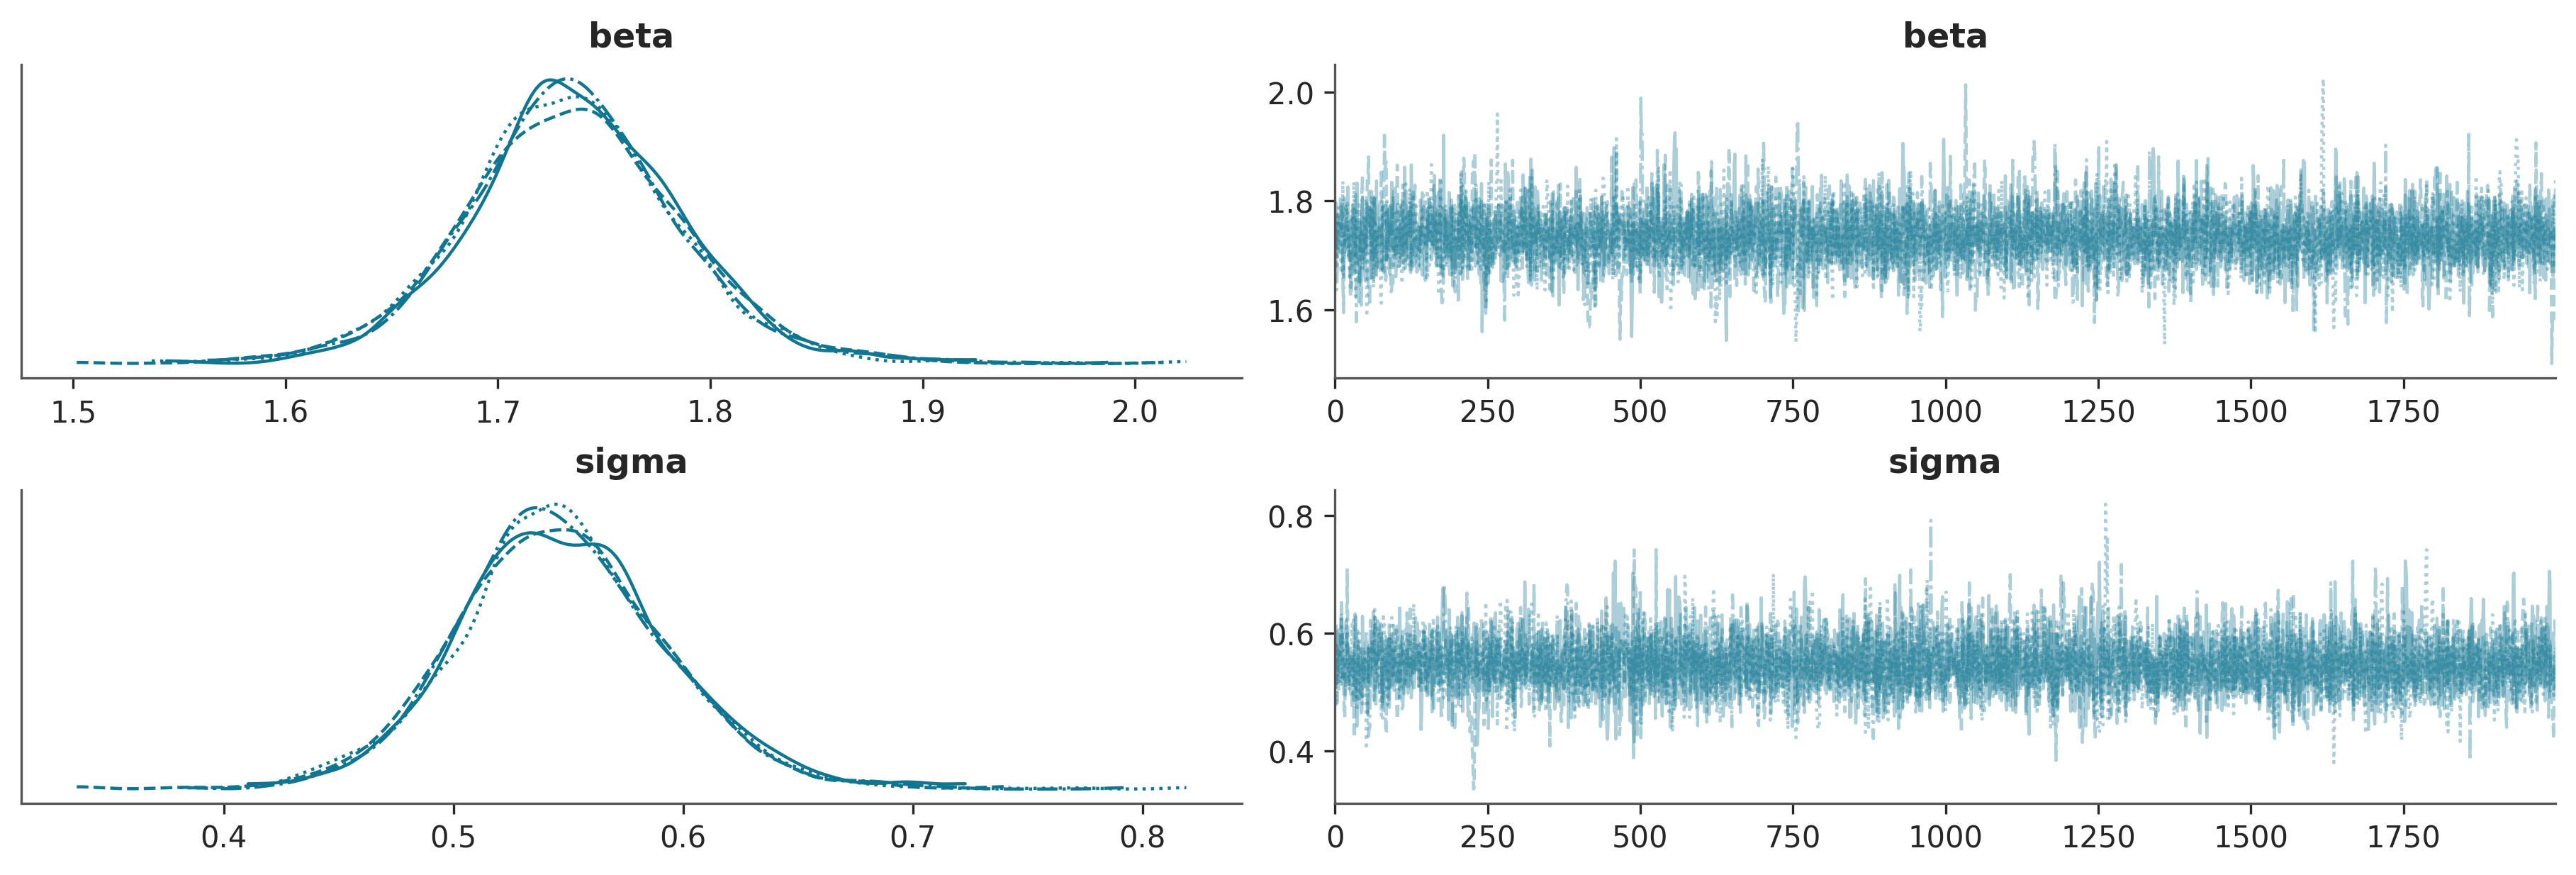

In [15]:
import arviz as az

az.style.use("arviz-doc")
az.plot_trace(fit_sir_model,
              var_names = ["beta", "sigma"])

### Model
Now that we trust our inference, we can check the utility of our model. Utility is problem specific and can include the precise estimation of a quantity or predicting future behaviors. In general, it is good to check if our model, once fitted, produces simulations that are consistent with the observed data. This is the idea behind posterior predictive checks.

We sample predictions, $y_{pred}$, from $p(y_{pred}∣y)$ and use these samples to construct a fitted curve for students in bed, together with the uncertainty (90% interval, meaning observed data is expected to fall outside of this interval one in ten times). This posterior predictive check allows us to verify if the model captures the structure of the data. Here we see that the model gives a satisfying fit to the data, and that the model uncertainty is able to capture the variation of the data.

In [16]:
post_pred = pd.DataFrame(sir_summary.filter(like="pred_cases", axis=0))
post_pred["t"] = range(1, 15)
post_pred["cases"] = list(df.in_bed)

post_pred = post_pred.set_index("t")
post_pred

Mean      MCSE    StdDev      MAD      5%    50%    95%  ESS_bulk  \
t                                                                            
1     3.30713  0.024284   2.20662   1.4826    0.00    3.0    7.0   8292.86   
2    10.65390  0.059308   5.41017   4.4478    3.00   10.0   20.0   8323.43   
3    32.62800  0.173461  14.76170  13.3434   13.00   31.0   59.0   7596.62   
4    89.50210  0.460056  39.92880  32.6172   37.00   83.0  160.0   7811.33   
5   178.61800  0.851387  75.03640  65.2344   78.00  168.0  314.0   7893.82   
6   239.85800  1.050590  93.24410  85.9908  107.00  231.0  404.0   7900.93   
7   229.88000  1.025590  88.96090  78.5778  103.00  221.0  387.0   7686.05   
8   180.97600  0.813472  70.78250  62.2692   81.95  174.0  307.0   7477.31   
9   127.98500  0.605202  52.17290  47.4432   55.00  121.0  222.0   7639.01   
10   85.87060  0.402802  35.21130  31.1346   37.00   81.0  150.0   7656.24   
11   56.42850  0.278131  24.05610  22.2390   23.00   54.0   99.0   7475.79   
12   36.42430  0.197036  16.09700  14.8260   14.00   35.0   64.0   7096.50   
13   23.40300  0.137267  11.14240  10.3782    8.00   22.0   44.0   6886.23   
14   15.06240  0.094387   7.81291   7.4130    5.00   14.0   29.0   7017.30   

    ESS_tail     R_hat  cases  
t                              
1    7900.89  0.999841      3  
2    8142.96  1.000060      8  
3    7535.13  1.000310     26  
4    7243.02  1.000230     76  
5    7322.99  0.999925    225  
6    7857.55  1.000410    298  
7    7191.68  1.000120    258  
8    7691.15  0.999937    233  
9    7278.42  1.000300    189  
10   7567.06  1.000030    128  
11   7673.27  0.999858     68  
12   6868.29  1.000060     29  
13   6708.05  1.000480     14  
14   7119.13  1.000190      4

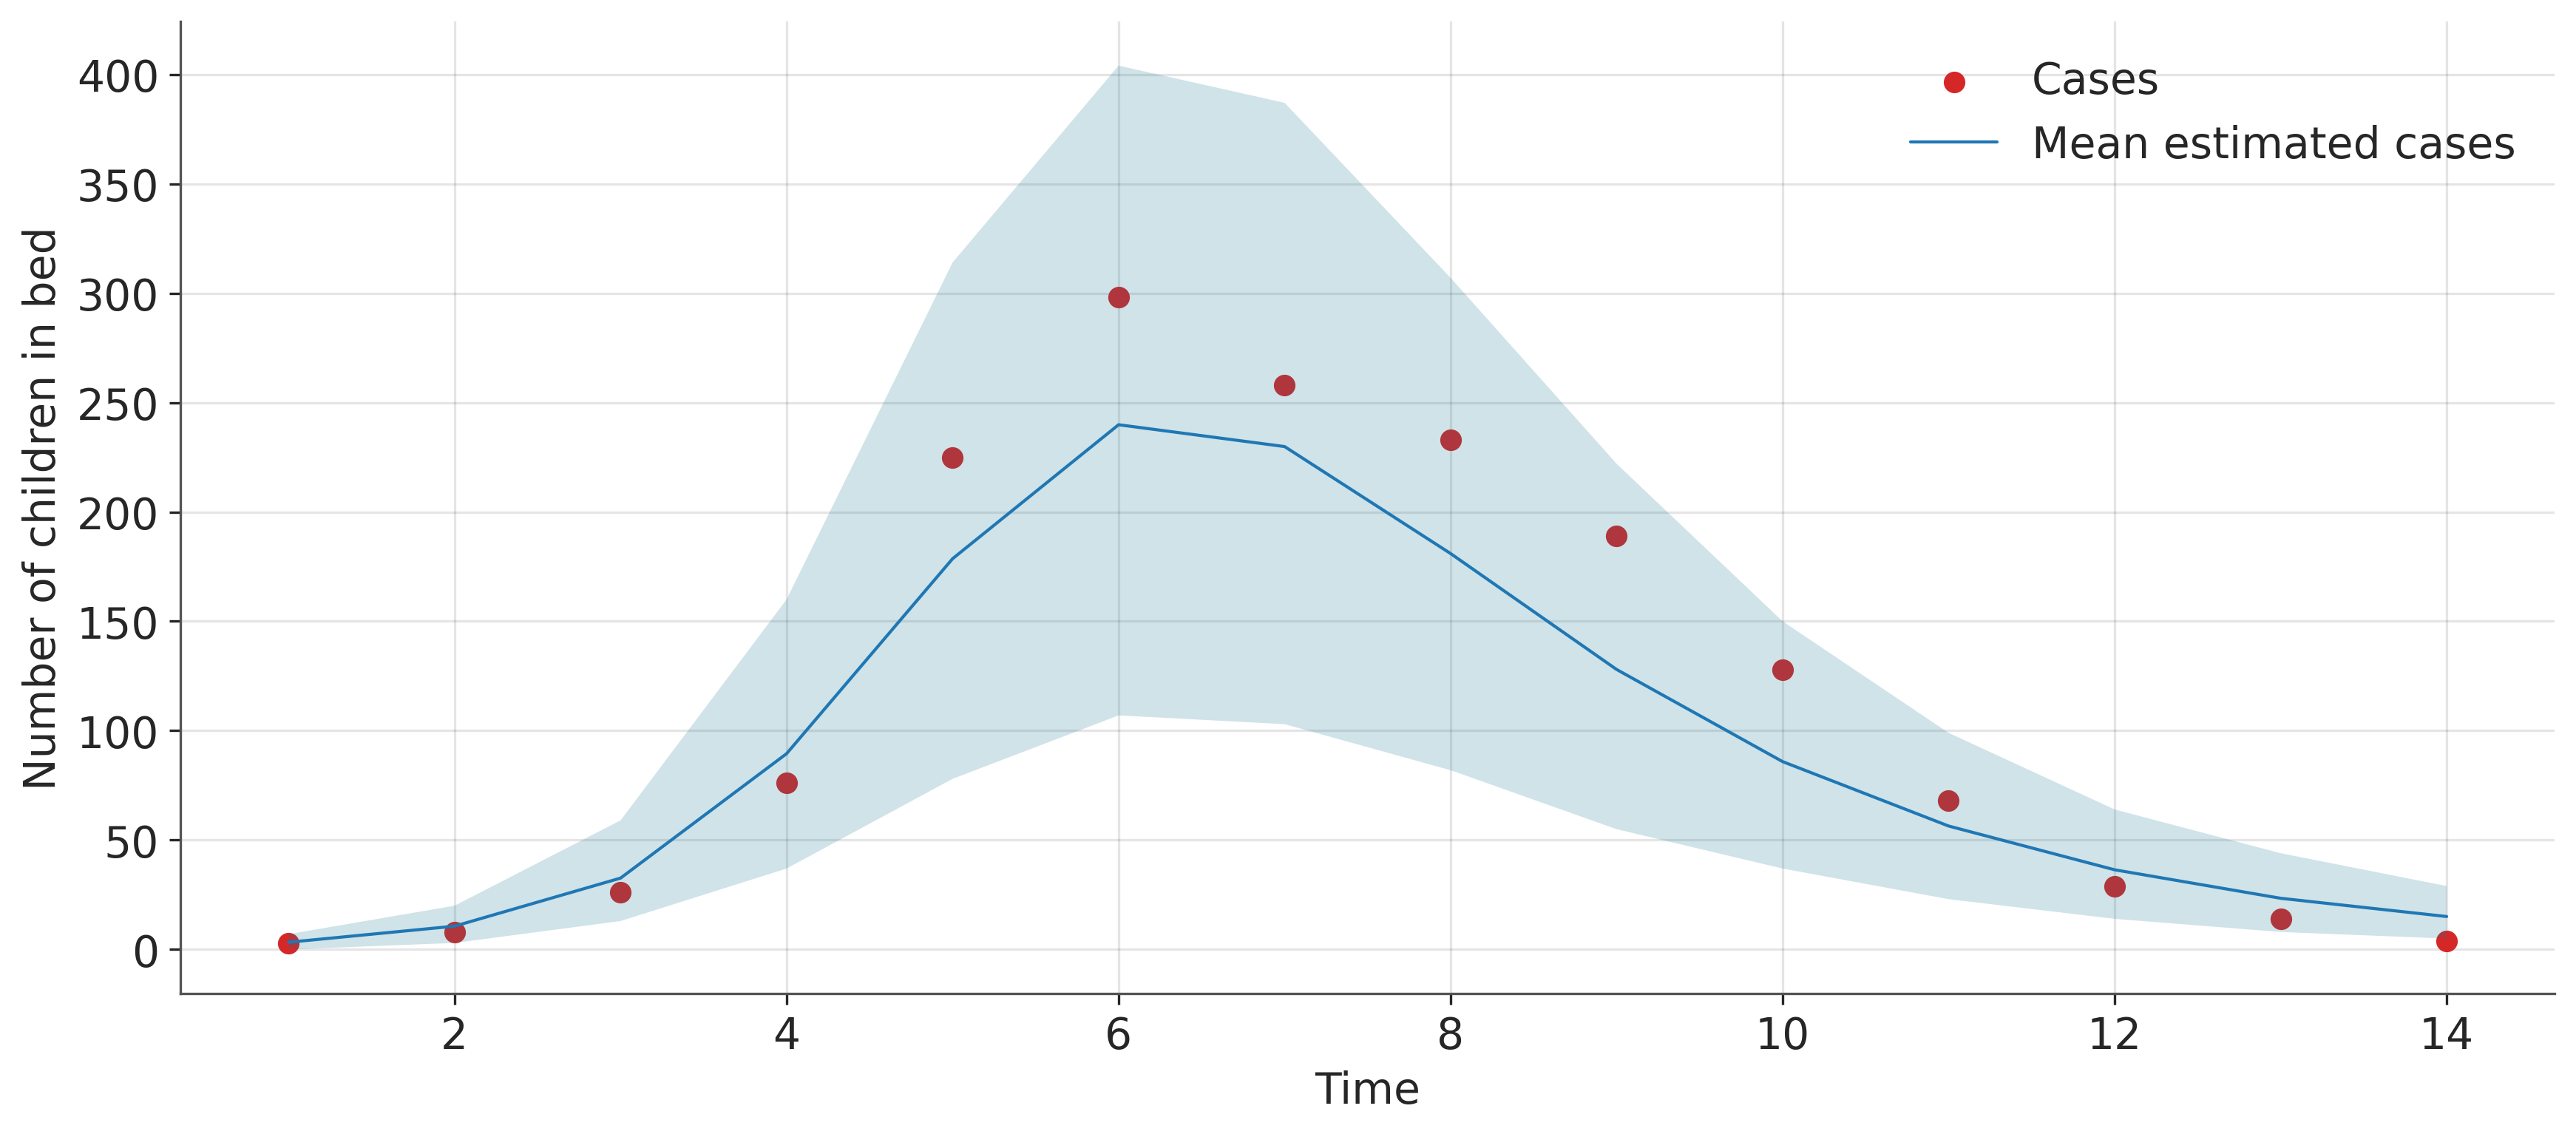

In [18]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.grid(True, which='both', color = 'k', alpha = 0.1)
ax1.set_ylabel('Number of children in bed')
ax1.set_xlabel('Time')
ax1.scatter(x = post_pred.index, y = post_pred.cases, color = 'tab:red', label = "Cases")
ax1.plot(post_pred.Mean, color = 'tab:blue', linewidth= 1, label = "Mean estimated cases")
ax1.fill_between(x = post_pred.index,  y1 = post_pred['5%'], y2 = post_pred['95%'], alpha=0.2)
ax1.set_facecolor('white')
ax1.legend(loc = "upper right")

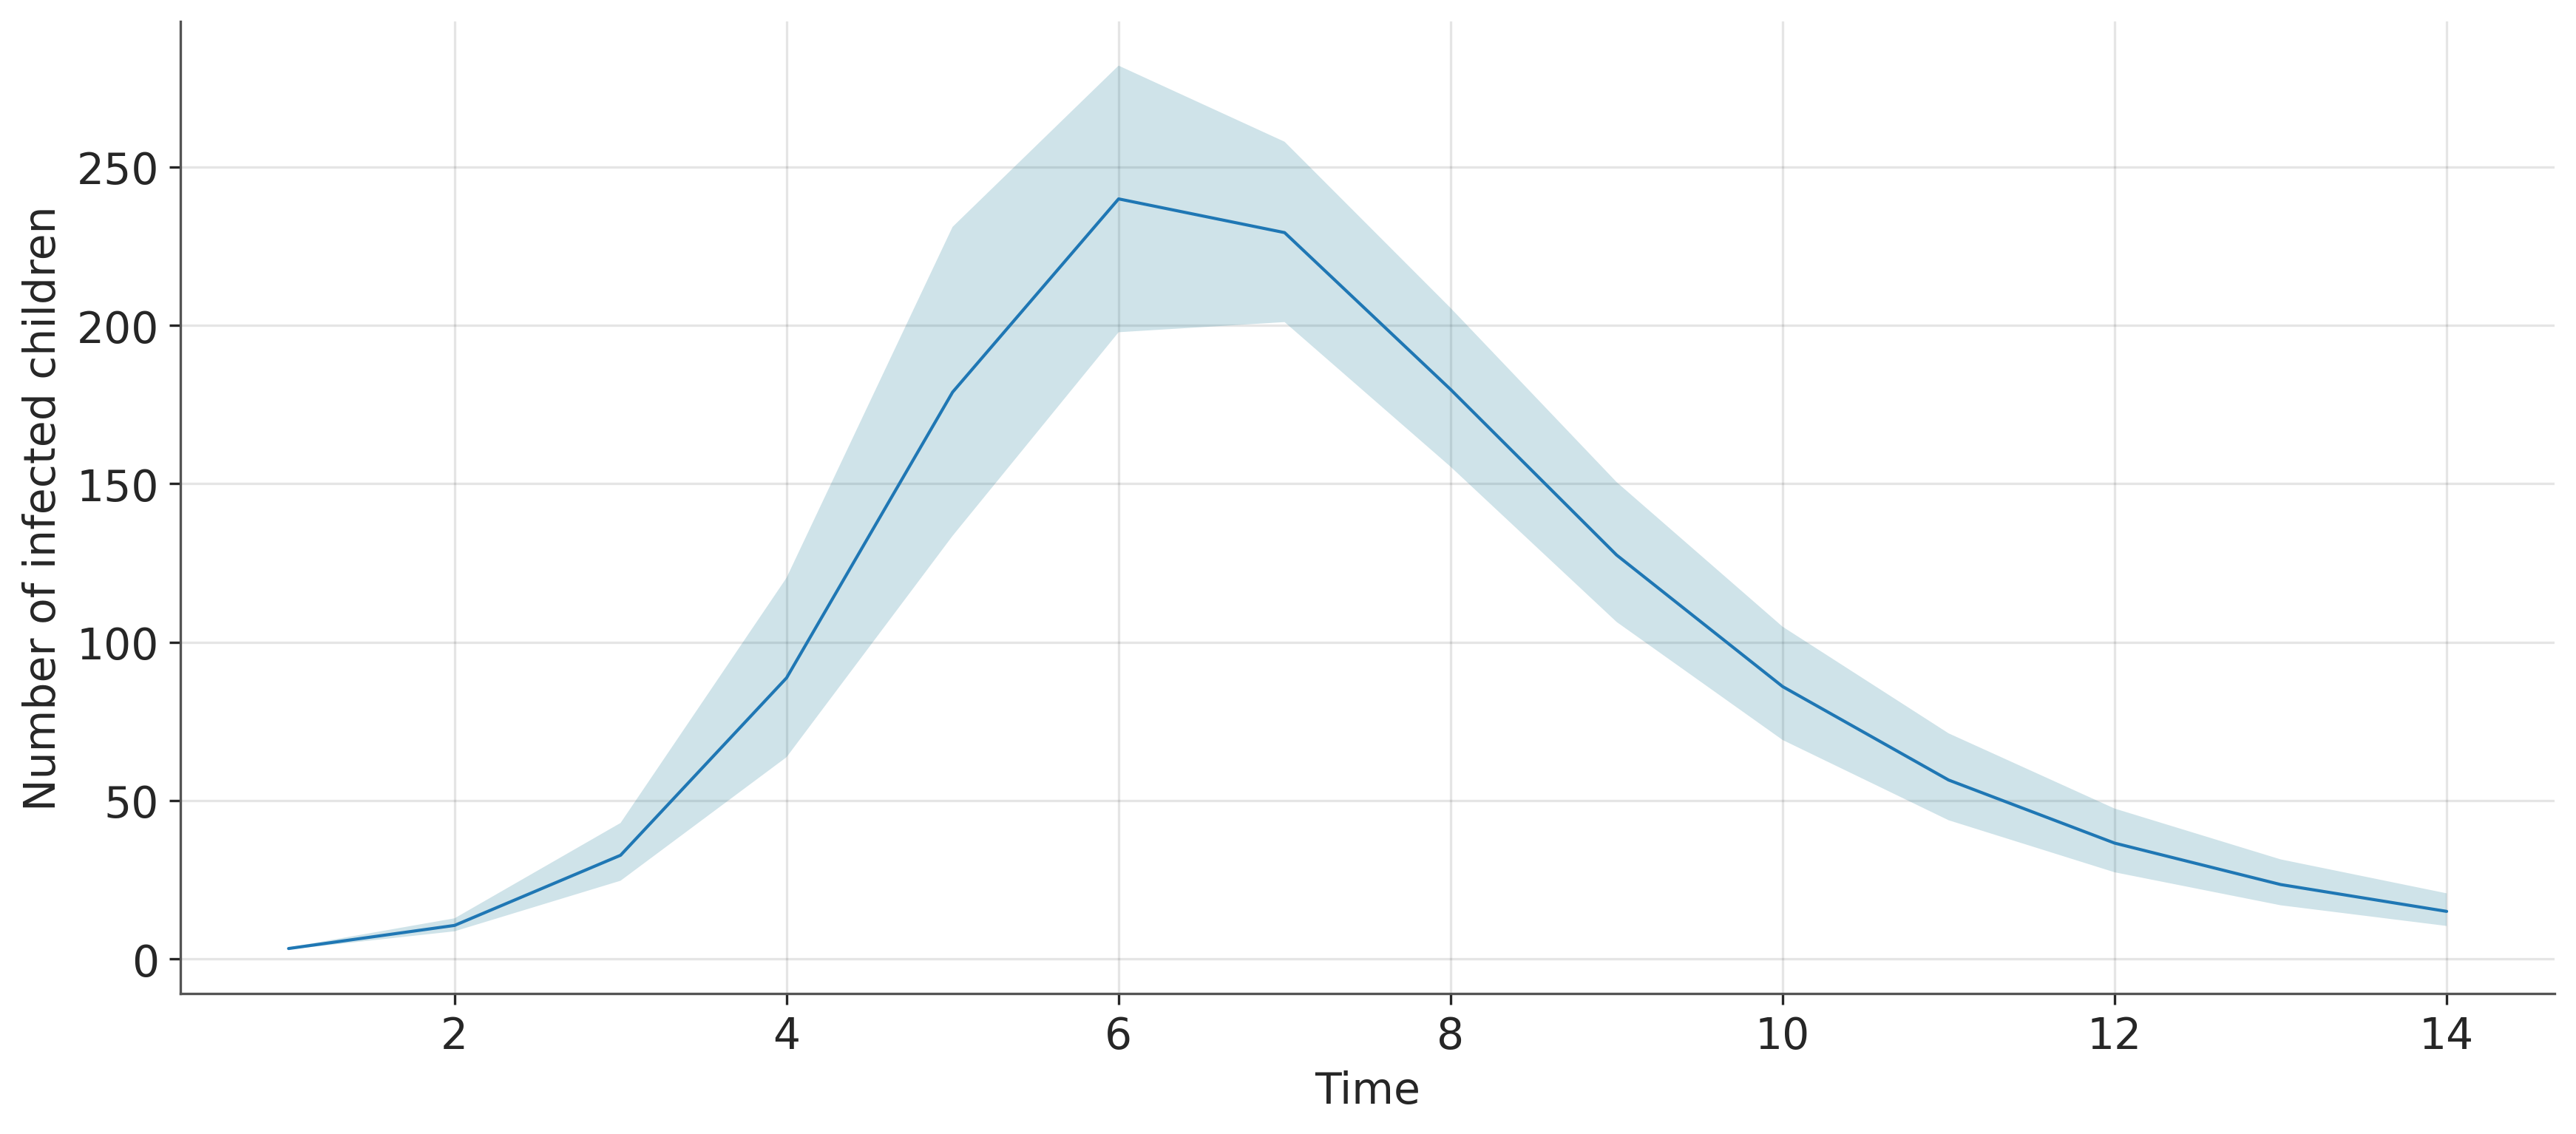

In [19]:
infected = sir_summary.filter(items=("y[1,2]", "y[2,2]", "y[3,2]", "y[4,2]", "y[5,2]",
                                     "y[6,2]", "y[7,2]", "y[8,2]", "y[9,2]", "y[10,2]",
                                     "y[11,2]", "y[12,2]", "y[13,2]", "y[14,2]",), axis=0)

infected["t"] = range(1, 15)
infected = infected.set_index("t")

fig, ax1 = plt.subplots()
ax1.grid(True, which='both', color = 'k', alpha = 0.1)
ax1.set_ylabel('Number of infected children')
ax1.set_xlabel('Time')
ax1.plot(infected.Mean, color = 'tab:blue', linewidth= 1, label = "Mean estimated number of infected")
ax1.fill_between(x = infected.index,  y1 = infected['5%'], y2 = infected['95%'], alpha=0.2)
ax1.set_facecolor('white')

### Priors
We can check if our priors are sound by computing the a priori probability of various epidemiological parameters of interest. For instance for influenza, we know that the recovery time is approximately 1 week. We want priors that allow for every reasonable configurations of the data but exclude absurd scenarios, per our domain expertise. To check if our priors fulfill this role, we can do a prior predictive check.

To conduct a prior predictive check, we take the same model as before, put the parameters of interest in the generated_quantities code block, and remove the likelihood term from the model. Without the likelihood, the parameters are not fitted to the data and are thus sampled from their prior distribution. The Stan code is thus the same as the final Stan code, without the ```cases ~ neg_binomial_2(y[:,2], phi);``` line.

We can now compile the model without the likelihood term.  

* You need to create a new model file called ```sir_model_prior.stan``` by removing the likelihood term from your model and saving it in your drive.
* You also need to change ``` pred_cases = neg_binomial_2_rng(y[:, 2], phi);``` to ``` pred_cases = neg_binomial_2_rng(y[:, 2] + 1e-5, phi);``` to ensure all your values are defined.

The following code will mount your drive to this notebook and load in the model:

In [35]:
from google.colab import drive
drive.mount('/content/drive')

stan_file_prior = 'drive/MyDrive/StatML4PopHealth/output/sir_model_prior.stan'
sir_model_prior = CmdStanModel(stan_file = stan_file_prior)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ValueError: Failed to get source info for Stan model '/content/drive/MyDrive/StatML4PopHealth/output/sir_model_prior.stan'. Console:
Semantic error in '/content/drive/MyDrive/StatML4PopHealth/output/sir_model_prior.stan', line 56, column 35 to column 49:
   -------------------------------------------------
    54:  
    55:    array[n_days] real pred_cases;
    56:    pred_cases = neg_binomial_2_rng((y[:, 2] + 1e-5), phi);
                                            ^
    57:  
    58:  }
   -------------------------------------------------

Ill-typed arguments supplied to infix operator +. Available signatures: 
(int, int) => int
(real, real) => real
(real, vector) => vector
(vector, real) => vector
(vector, vector) => vector
(complex, complex) => complex
(real, row_vector) => row_vector
(row_vector, real) => row_vector
(row_vector, row_vector) => row_vector
(real, matrix) => matrix
(matrix, real) => matrix
(matrix, matrix) => matrix
(complex, complex_vector) => complex_vector
(complex_vector, complex) => complex_vector
(complex_vector, complex_vector) => complex_vector
(complex, complex_row_vector) => complex_row_vector
(complex_row_vector, complex) => complex_row_vector
(complex_row_vector, complex_row_vector) => complex_row_vector
(complex, complex_matrix) => complex_matrix
(complex_matrix, complex) => complex_matrix
(complex_matrix, complex_matrix) => complex_matrix
Instead supplied arguments of incompatible type: array[] real, real.



Then we can sample from it.

In [28]:
prior_check = sir_model_prior.sample(data = stan_data,
                                     iter_sampling = 2000,
                                     chains = 4,
                                     seed = 0)

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

In [32]:
prior_check.diagnose()

'Checking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nRank-normalized split effective sample size satisfactory for all parameters.\n\nRank-normalized split R-hat values satisfactory for all parameters.\n\nProcessing complete, no problems detected.\n'

This gives us samples from the a priori distribution of parameters, which we can visualize. Here we show the distribution of the log of the recovery time, with the red bars showing loose bounds on the recovery time (1/2 day and 30 days). We observe that most of the probability mass is between the red bars but we still allow more extreme values, meaning our posterior can concentrate outside the bars, if the data warrants it.


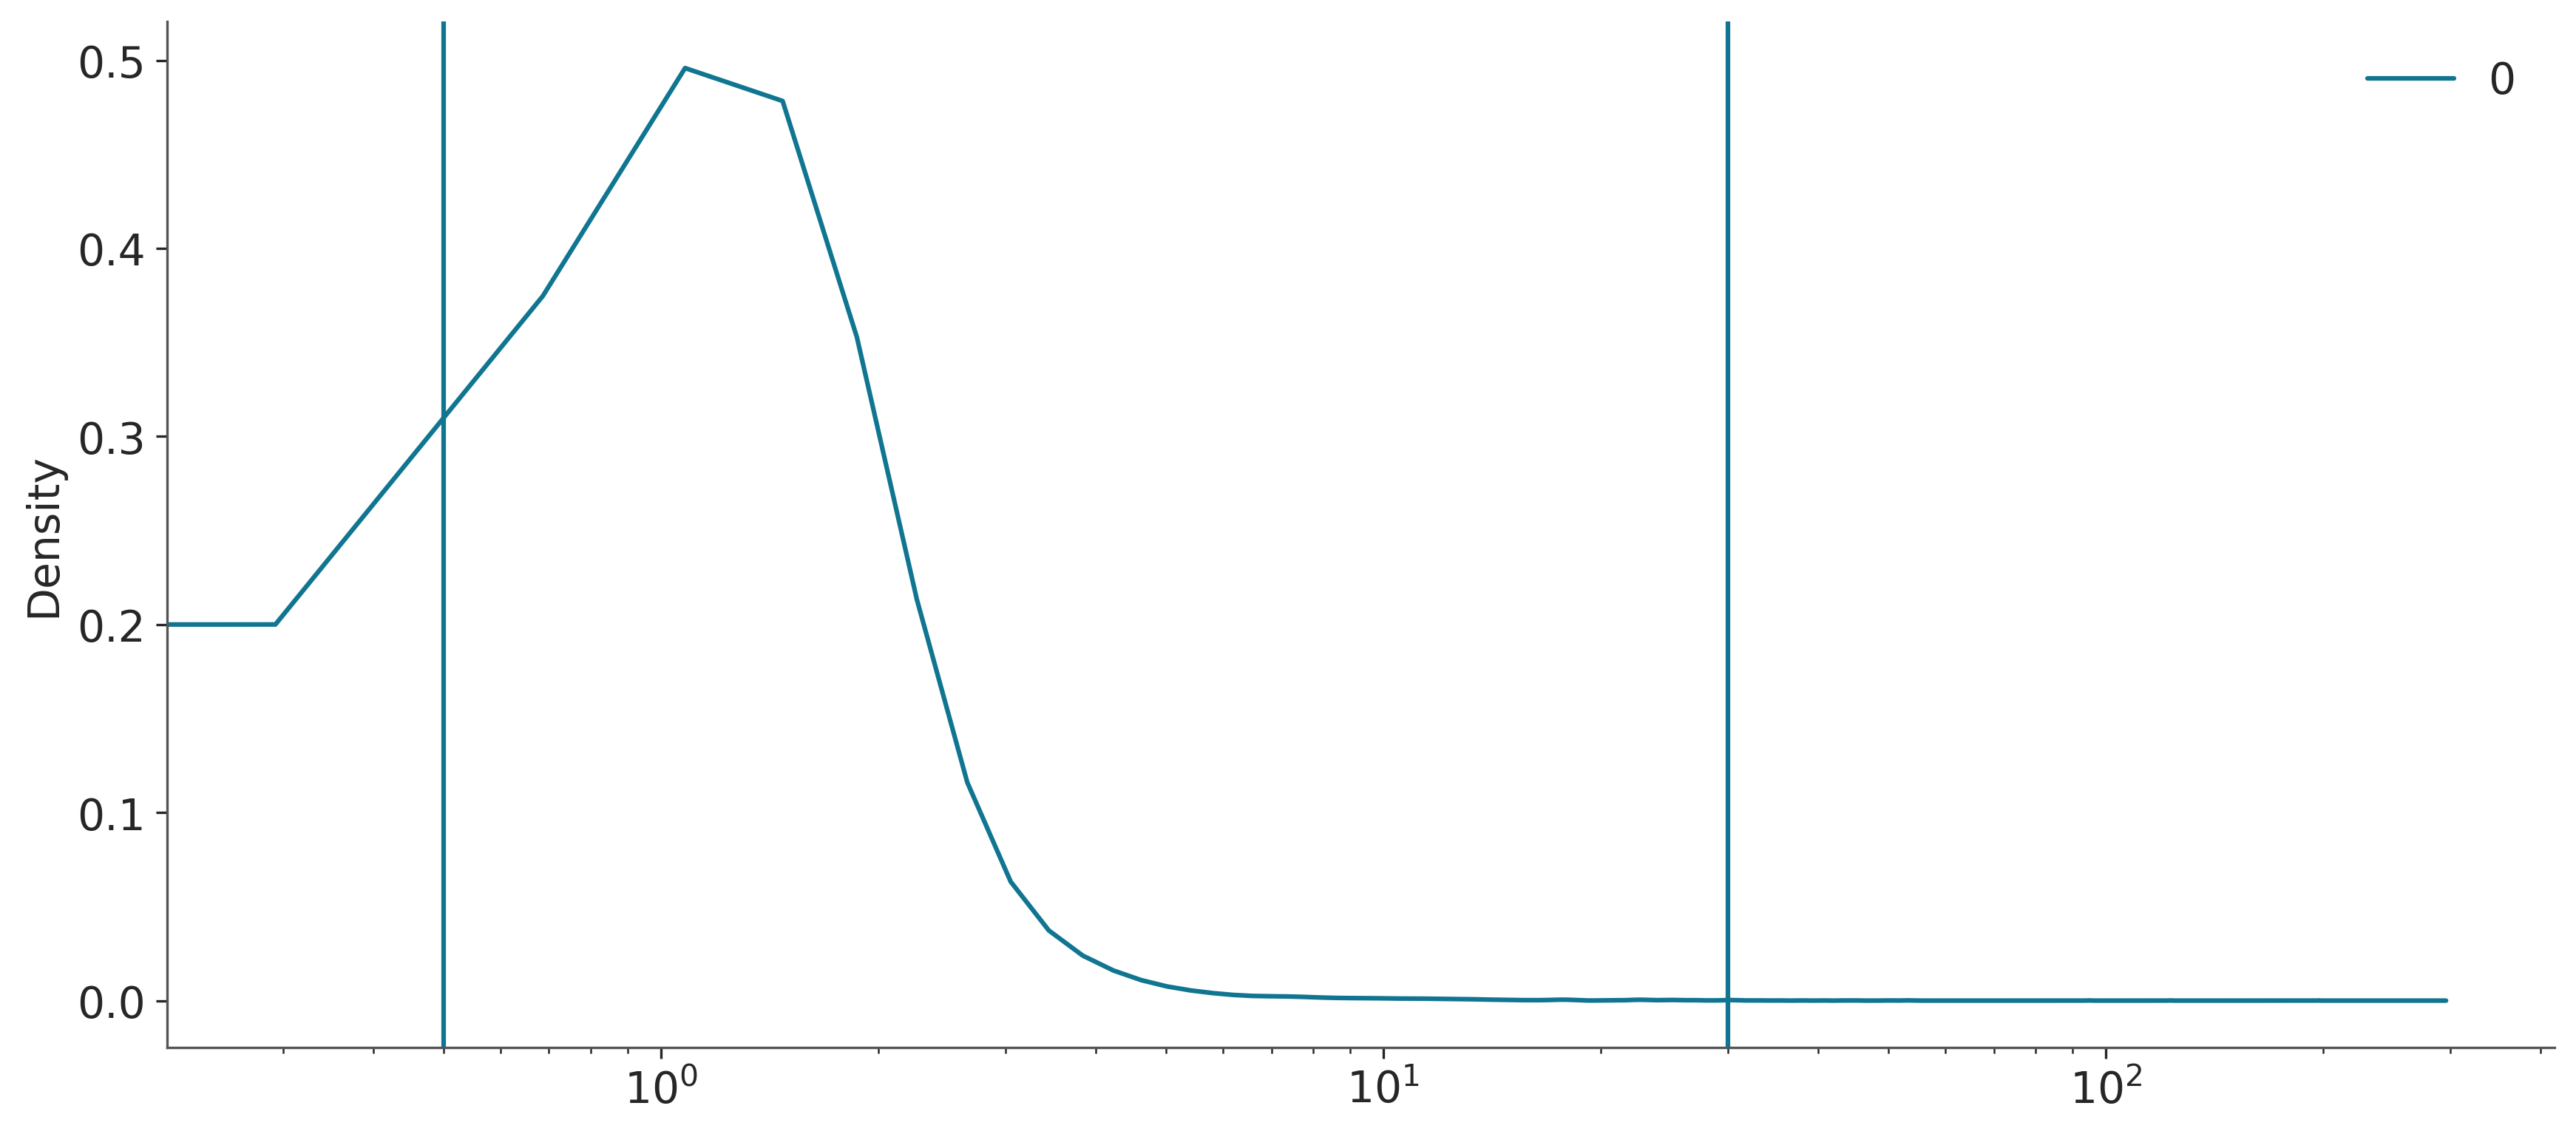

In [29]:
recovery_time = prior_check.stan_variable("recovery_time")
ax = pd.DataFrame(recovery_time).plot(kind='density', logx=True)
ax.axvline(x=0.5)
ax.axvline(x=30)


We thus see that these distributions are coherent with domain knowledge. See [here](https://github.com/stan-dev/stan/wiki/Prior-Choice-Recommendations) for more recommendations on prior choice.

We can also plot trajectories of infection according to the prior, that is the number of infected people at each time according to prior distributions of parameters. The dashed red line shows the total population of children.


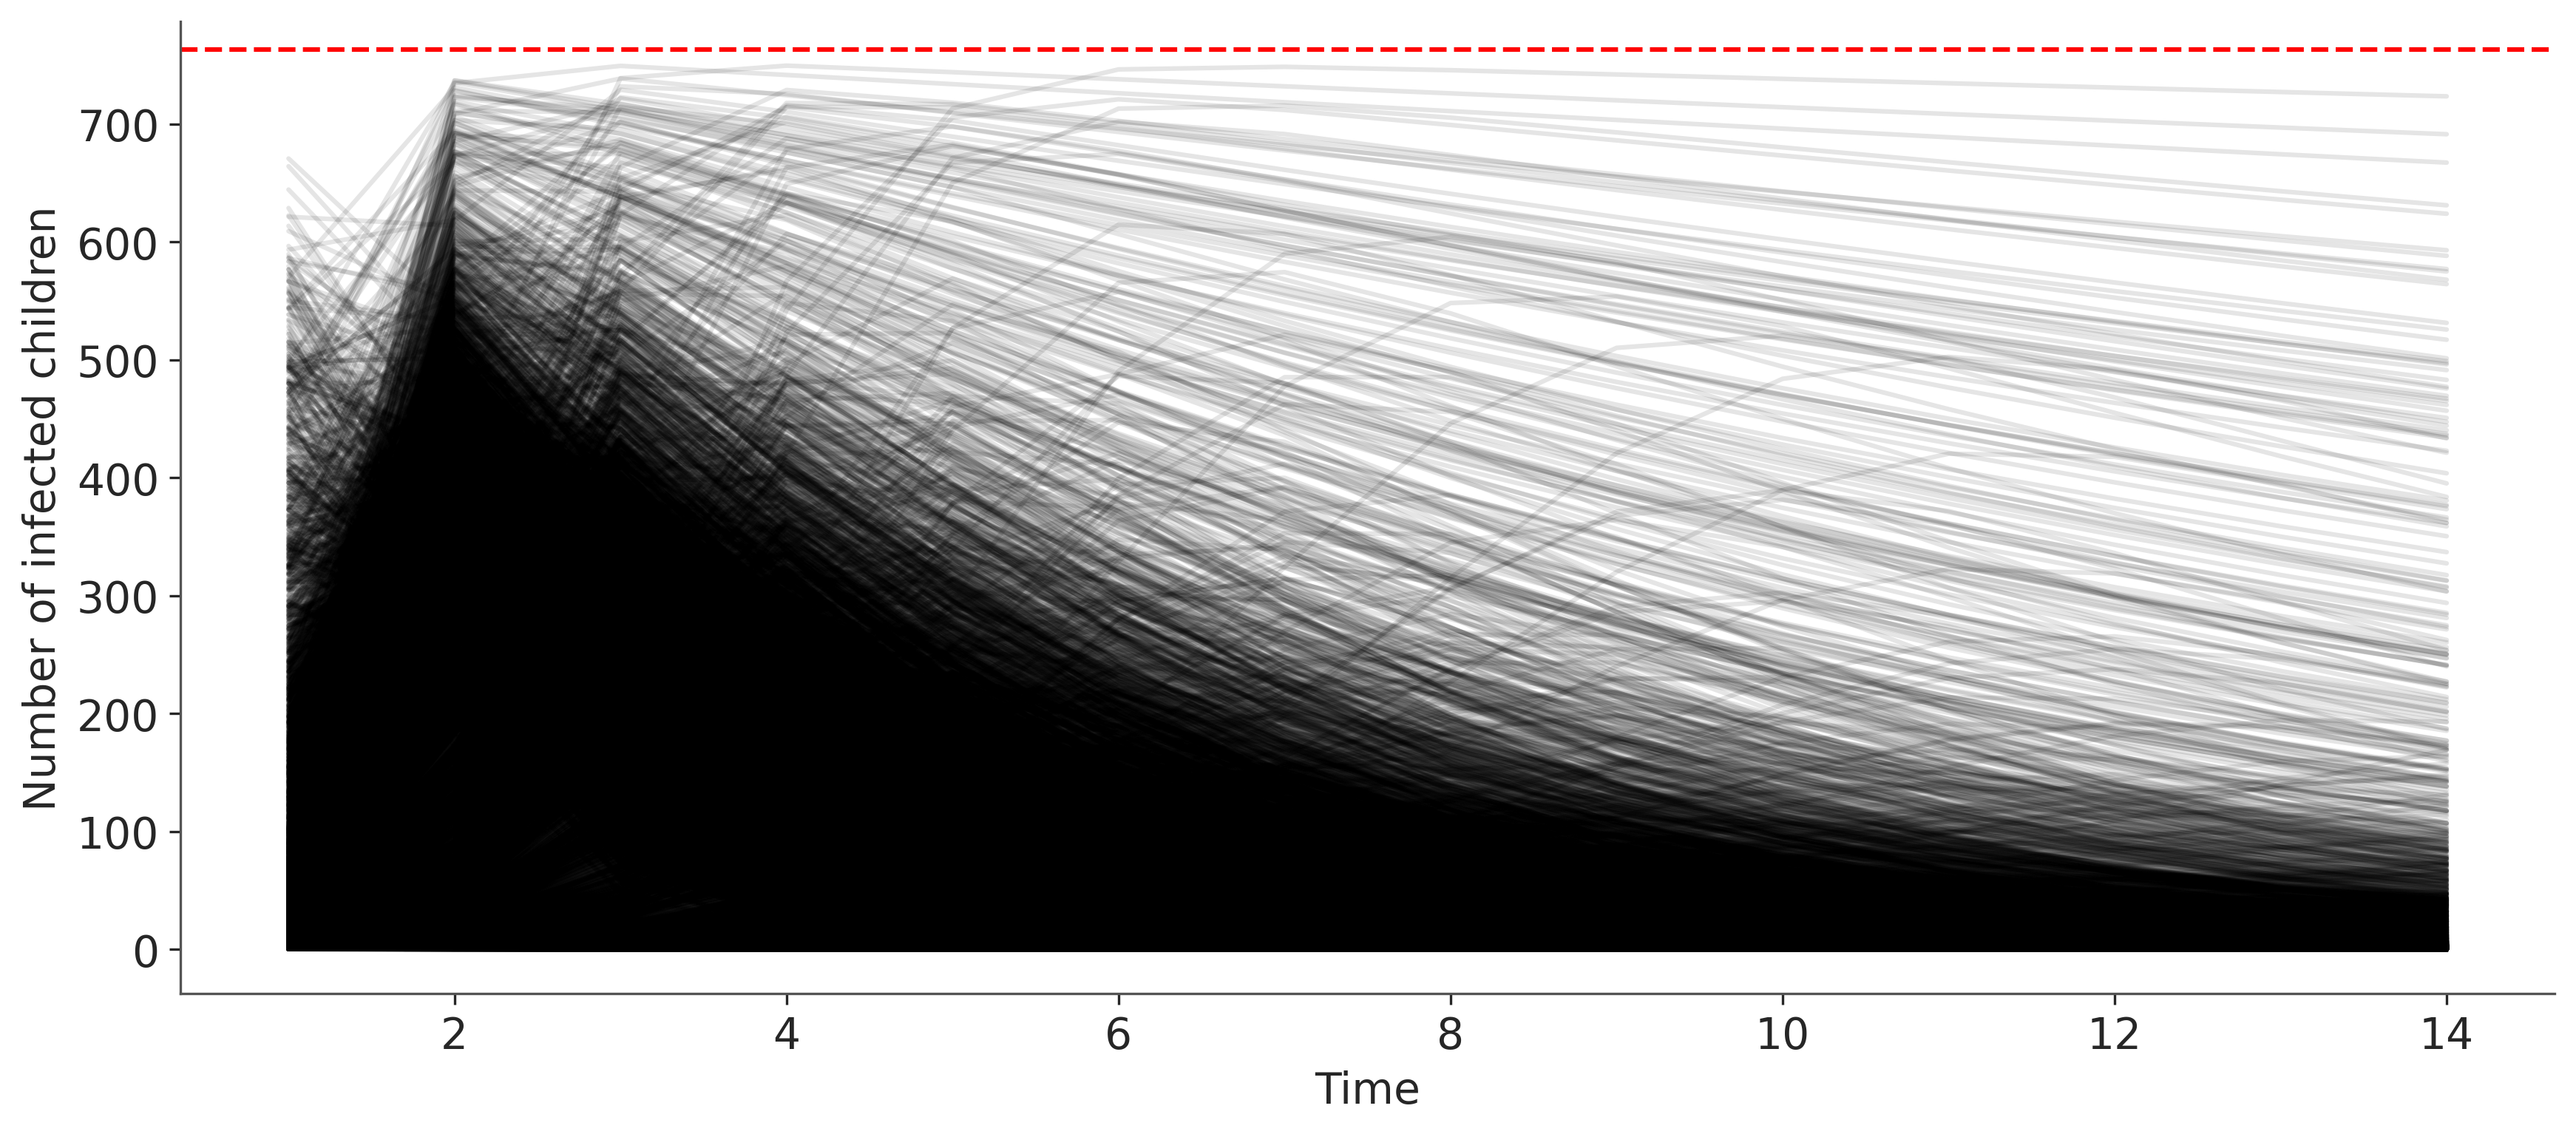

In [30]:
infection_draws = prior_check.draws_pd("y")
lines = plt.plot(range(1,15),
                 infection_draws.iloc[:, [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]].T,
                 color = "k", alpha = 0.1)
plt.axhline(y=763, color='r', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Number of infected children')
plt.show()


And the median (blue line) and 90% interval of the a priori number of student in bed (i.e the observed number of infected students).

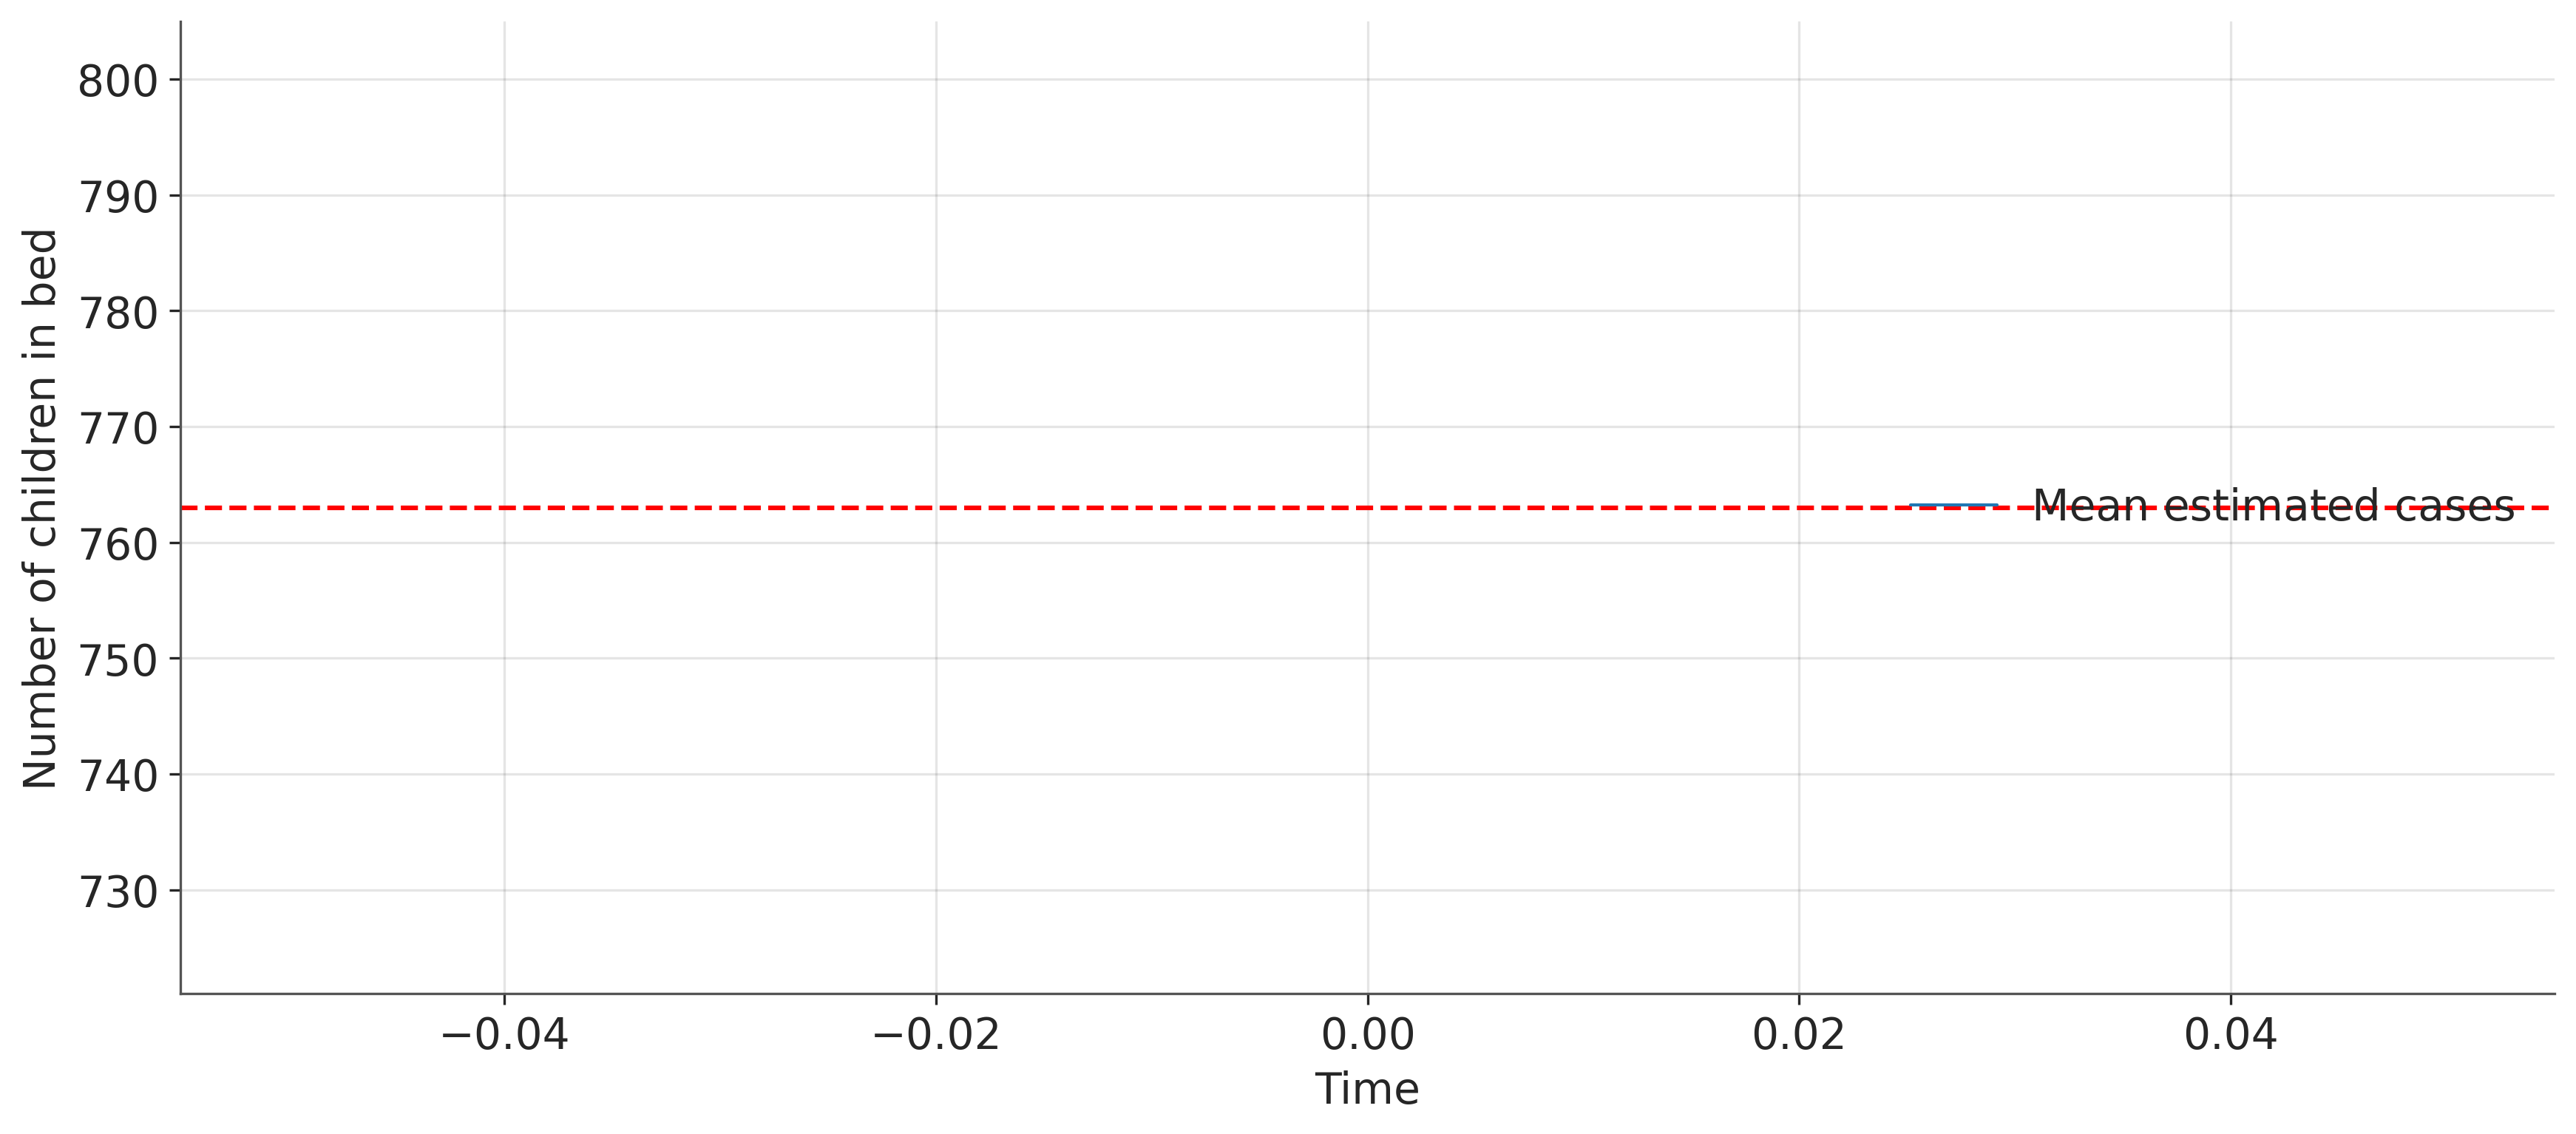

In [31]:
prior_pred_cases = pd.DataFrame(prior_check.summary().filter(like="pred_cases", axis=0))
prior_pred_cases["t"] = range(1, 15)
prior_pred_cases = prior_pred_cases.set_index("t")

fig, ax1 = plt.subplots()
ax1.grid(True, which='both', color = 'k', alpha = 0.1)
ax1.set_ylabel('Number of children in bed')
ax1.set_xlabel('Time')
ax1.plot(prior_pred_cases.Mean, color = 'tab:blue', linewidth= 1, label = "Mean estimated cases")
ax1.fill_between(x = prior_pred_cases.index,  y1 = prior_pred_cases['5%'], y2 = prior_pred_cases['95%'], alpha=0.2)
ax1.set_facecolor('white')
ax1.legend(loc = "center right")
ax1.axhline(y=763, color='r', linestyle='--')


It seems that most trajectories are reasonable and quite diverse. Still, some of the curves look a little bit funky and suggest we could refine our priors and make them more informative, although it may not be needed here.

Typically, we can get away with priors that do not capture all our a priori knowledge, provided the data is informative enough. However when dealing with complicated models and relatively sparse data, we usually need well constructed priors to regularize our estimates and avoid non-identifiability.


## Fitting an SEIR model to prevalence data

A person who is infected with flu is not immediately infectious so it makes sense to include an "Exposed" compartment in our model. This should improve the fit to our model (although we don't evaluate that here in this practical).

<img src=" https://raw.githubusercontent.com/MLGlobalHealth/StatML4PopHealth/main/practicals/day4/practical5/images/seir.png">

The notation in Figure 2 is similar to the SIR model but we have a new parameter $\gamma$ which is the rate of progression from the exposed to infected compartment.  It is equal to 1 divided by the incubation period.

Q4) What are the equations for an SEIR model?

$$\frac{dS}{dt} = -\beta \frac{I}{N} S$$
$$\frac{dE}{dt} = \beta \frac{I}{N} - \gamma E $$
$$\frac{dI}{dt} = \gamma E - \sigma I $$
$$\frac{dR}{dt} = \sigma I $$


Q5) Edit the stan model file to turn the SIR model in an SEIR model. Save this in the ```stan_model``` directory under a new file called ```seir_prevalence.stan```.  Since we have a new parameter in our model $\gamma$ we need to define a prior for this.  From the literature the incubation period for flu is around 2 days so a prior for gamma of $N(0.5, 0.25)$ would be suitable.  

Hint:  You will need to change the following parts of the model.

- The functions block to encode the new ODE model,
- The data block so that y0 has dimensions of 4,
- The parameter block so the gamma parameter is added,
- The model block needs the prior for gamma adding and,
- The generated quantity block can be used to calculate the incubation period (1/gamma).

Similar to before, the SEIR model can be run as follows. Note we also need to add an initial condition for our exposed compartment.  

Q6) Print a summary for your results:

Q7) Produce plots for our sample predictions of the number of students in bed.


## Fitting an SEIR model to incidence data

The number of infected people in a population is not the only type of data collected during an outbreak. Often we get a line list or a list of the times at which people were infected (or showed symptoms). We have simulated some incidence data for a flu like outbreak with similar parameters to the school data and this can be found in the file ```incidence_seir.csv```. (Do speak to one of us if you are interested in how we did this!).


In [ ]:
# Read in incidence data

# Load in the data using pandas
import pandas as pd
df = pd.read_csv('incidence.csv')

print(df)


We now need to change our model to fit the incidence from our model to the data rather than the prevalence. First we need to calculate the incidence, which is equal to the number of people leaving the exposed component at each time step.  

Q8) Make a new copy of our SEIR model by re-saving ```seir_prevalence.stan``` as ```seir_incidence.stan```. The incidence can be calculated by first adding an ODE for cumumlative incidence in the functions block.

```python
dydt[5] = gamma * E
```
Remember you will need to change the dimensions of dydt, the output of solving your differential equations y and create a new initial condition.  Then you will need to create a for loop that calculates incidence.

```python
incidence[1] = y[1, 5] - 0
for (i in 2:n_days)
  incidence[i] = y[i, 5] - y[i-1, 5];
```


Then we need to update the likelihood in the model block to the following since we are now saying that our incidence is negatively binomially distributed instead of the total number of cases.
```python
//sampling distribution
cases ~ neg_binomial_2(incidence, phi);
```

Q9) Use similar code to before to fit our model and print a summary of our parameters.

Q10) Plot your data and model fit.

Q11) Explore what impact changing your priors has on the model fit.


## Extension material

Now you have fit simple SIR and SEIR model to some data based on influenser, we will consider using all the material you have learned today to design and fit a compartmental model of Ebola to the line list incidence data found in the supplementary material of [Garske (2017)](https://royalsocietypublishing.org/doi/10.1098/rstb.2016.0308).

Suggested workflow:

1) Download and investigate the [data](https://royalsocietypublishing.org/action/downloadSupplement?doi=10.1098%2Frstb.2016.0308&file=rstb20160308supp1.csv)

2) Do a quick literature review about how Ebola is spread.  A few good resources: [Drake et al. (2015)](https://pmc.ncbi.nlm.nih.gov/articles/PMC4517740/), [WHO fact sheet](https://www.who.int/news-room/fact-sheets/detail/ebola-virus-disease) and [Nash et al. (2024)](https://www.thelancet.com/article/S1473-3099(24)00374-8/abstract).

3) Design a flow chart for Ebola transmission using pen and paper.

4) Write the equations for this model.

5) Code them using python and stan.

6) Investigate what priors make sense.